# Task 3 : Evolution of Property in Singapore Over the Years

This notebook dives into an exploration of how the constructions of new units in Singapore has evolved over the years, and their value in today's market.

More specifically,
- We investigate the price of old condo and hdb units, and compare them with newly constructured units. We highlight a peculiar trend in prices that can be explained by Singapore government's Home Improvement Programme (HIP) initiative.
- We see the change in unit sizes, both in terms of raw property size, as well as other factors like number of rooms etc., and find interesting patterns about the changing preferences of Singapore residents.

### Setting up the Notebook

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Set2')

from dataloader import read_csv
from preprocessing import preprocess_data_for_classification

### Load Cleaned Dataset

In [2]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')
testX, _ = read_csv('data/test.csv')

trainX, trainY, testX = preprocess_data_for_classification(trainX, trainY, testX)

df = pd.concat([trainX, trainY], axis=1)

## Property Prices and Building Age

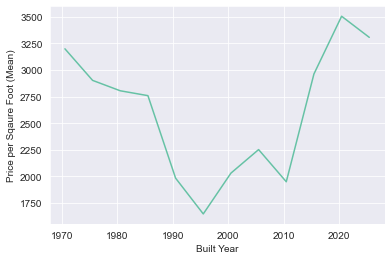

In [10]:
built_year, psf = df['built_year'], df['price']/df['size_sqft']

year_mid, psf_mean, num_units = [], [], []
year_range = (int(np.min(built_year)), int(np.max(built_year)))
for bin_st in range(year_range[0], year_range[1], 5):
    bin_end = bin_st + 5
    bin_index = (built_year < bin_end) & (built_year >= bin_st)
    num_units.append(np.sum(bin_index))
    year_mid.append((bin_st + bin_end)/2)
    psf_mean.append(np.mean(psf[bin_index]))
    
#### Remove the bin 1963-1968 as it contains only 48 units and skews the result for the rest of the trend
year_mid = year_mid[1:]
psf_mean = psf_mean[1:]
    
sns.lineplot({"Built Year": year_mid, "Price per Sqaure Foot (Mean)": psf_mean}, x="Built Year", y="Price per Sqaure Foot (Mean)")

plt.show()

## Why Are Old Properties So Expensive?

We see an interesting trend in the figure above where the property prices of houses build in `1970s-1980s` is higher than that of properties built in `1990s-2000s`. The prices of new properties are again higher, thus further highlighting this dip for properties built in `1990s-2000s`.
We believe this is because of the government funded [House Improvement Programme (HIP)](https://www.hdb.gov.sg/residential/living-in-an-hdb-flat/sers-and-upgrading-programmes/upgrading-programmes/types/home-improvement-programme-hip).

HIP provides funds to renovate buildings that are 30-40 years old. The initiative was first launched by the Singapore government in 2007, for flats built up until 1986. This is exactly where the price suddenly drops in our graph! We believe that most old buildings have recently gone through renovation and thus are valued higher by the property market than building which are less old but haven't gone through their first renovation yet.

**That's neat! But why should anyone care?** In 2018, Singapore government extended HIP to include flats built between 1987 and 1997. We expect the prices of these units to go up in the next decade or so, and thus could be a good long-term investment.

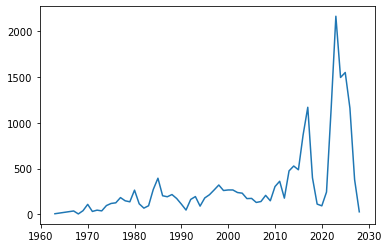

In [16]:
plt.plot(df_year.index.values, df['built_year'].value_counts().loc[df_year.index.values])
plt.show()

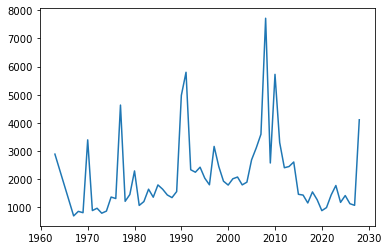

In [17]:
plt.plot(df_year.index.values, df_year['size_sqft'])
plt.show()

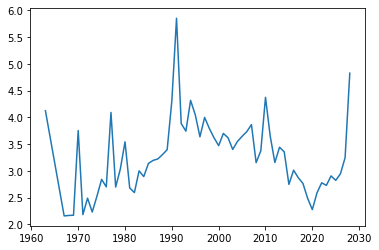

In [18]:
plt.plot(df_year.index.values, df_year['num_beds'])
plt.show()